# Blood Pressure from PPG signal

In this notebook, you should solve the problem in Task 4 (blood pressure estimation from PPG signal) in the first assignment (<a href="http://kovan.ceng.metu.edu.tr/~sinan/DL/HW1.html">HW1</a>) using a CNN architecture that you should construct using the layers and the network you developed in this HW.

The notebook is intentionally composed of only this cell. You can copy-paste any text, data, cell, or code that you developed in this HW or HW1. You can add as many cells as you want. You can create files on the disk as freely as you like.

In [1]:
import random
import numpy as np
from metu.data_utils import load_dataset
import matplotlib.pyplot as plt
from cs231n.classifier_trainer import ClassifierTrainer
from cs231n.gradient_check import eval_numerical_gradient
from cs231n.classifiers.convnet import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [2]:
# Load the PPG dataset
# If your memory turns out to be sufficient, try loading a subset
def get_data(datafile,
             training_ratio=0.9,
             test_ratio=0.06,
             val_ratio=0.01):
    # Load the PPG training data
    X, y = load_dataset(datafile)

    # TODO: Split the data into training, validation and test sets
    length=len(y)
    num_training=int(length*training_ratio)
    num_val = int(length*val_ratio)
    num_test = min((length-num_training-num_val), int(length*test_ratio))
    mask = range(num_training-1)
    X_train = X[mask]
    y_train = y[mask]
    mask = range(num_training, num_training+num_test)
    X_test = X[mask]
    y_test = y[mask]
    mask = range(num_training+num_test, num_training+num_test+num_val)
    X_val = X[mask]
    y_val = y[mask]

    return X_train, y_train, X_val, y_val, X_test, y_test

datafile = './metu/dataset/Part_1.mat' #TODO: PATH to your data file

X_train, y_train, X_val, y_val, X_test, y_test = get_data(datafile)
print ("Number of instances in the training set: ", len(X_train))
print ("Number of instances in the validation set: ", len(X_val))
print ("Number of instances in the testing set: ", len(X_test))

Progress 100/100 in 67/67      data loading done.
Number of instances in the training set:  2229
Number of instances in the validation set:  24
Number of instances in the testing set:  148


In [3]:
net = PPGconvnet()
model = net.model
trainer = ClassifierTrainer()
best_model, loss_history, train_err_history, val_err_history = trainer.train_regression(
          X_train[:100], y_train[:100], X_val, y_val, model, net.ppg_convnet,
          reg=1e-6, momentum=0.9, learning_rate=1e-6, batch_size=10, num_epochs=10,
          verbose=True)

starting iteration  0
Finished epoch 0 / 10: cost 14559.654793, train: 16156.165475, val 16038.022307, lr 1.000000e-06
Finished epoch 1 / 10: cost 17373.333695, train: 16140.640719, val 16022.291472, lr 9.500000e-07
Finished epoch 2 / 10: cost 13706.002219, train: 16087.318424, val 15969.049068, lr 9.025000e-07
starting iteration  10
Finished epoch 3 / 10: cost 16326.735897, train: 15558.125830, val 15437.352361, lr 8.573750e-07
Finished epoch 4 / 10: cost 4512.516226, train: 523.038509, val 336.616612, lr 8.145062e-07
starting iteration  20
Finished epoch 5 / 10: cost 775.302343, train: 1489.712902, val 1302.062740, lr 7.737809e-07
Finished epoch 6 / 10: cost 1012.842968, train: 1135.262873, val 942.666838, lr 7.350919e-07
starting iteration  30
Finished epoch 7 / 10: cost 907.670385, train: 714.695177, val 543.037565, lr 6.983373e-07
Finished epoch 8 / 10: cost 1659.261577, train: 1177.806941, val 1008.391318, lr 6.634204e-07
starting iteration  40
Finished epoch 9 / 10: cost 1023.19

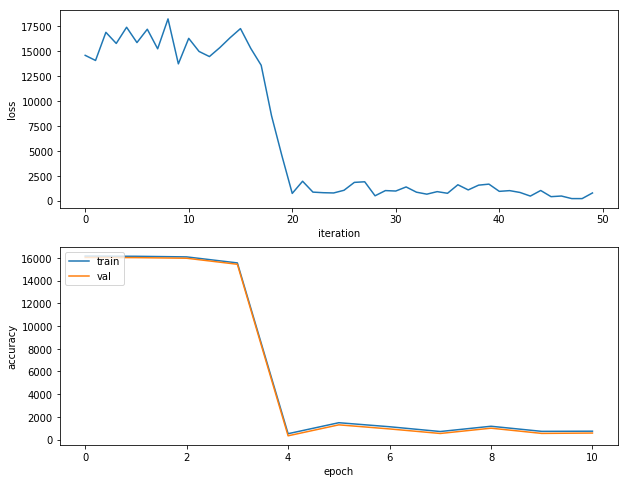

In [4]:
plt.subplot(2, 1, 1)
plt.plot(loss_history)
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(train_err_history)
plt.plot(val_err_history)
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [15]:
#net = PPGconvnet()
#model = net.model
#trainer = ClassifierTrainer()
best_model, loss_history, train_err_history, val_err_history = trainer.train_regression(
          X_train[:100], y_train[:100], X_val, y_val, model, net.ppg_convnet,
          reg=1e-6, momentum=0.9, learning_rate=1e-6, batch_size=10, num_epochs=10,
          verbose=True)

starting iteration  0
Finished epoch 0 / 10: cost 377.078876, train: 2250.162928, val 2022.339549, lr 1.000000e-06
Finished epoch 1 / 10: cost 8734.889723, train: 537.477484, val 337.186856, lr 9.500000e-07
starting iteration  10
Finished epoch 2 / 10: cost 16198.095061, train: 16283.773334, val 16066.089732, lr 9.025000e-07
starting iteration  20
Finished epoch 3 / 10: cost 14406.165375, train: 16171.865271, val 15956.399795, lr 8.573750e-07
starting iteration  30
Finished epoch 4 / 10: cost 17381.050571, train: 16132.548021, val 15917.163645, lr 8.145062e-07
starting iteration  40
Finished epoch 5 / 10: cost 13713.068894, train: 16103.954324, val 15888.610759, lr 7.737809e-07
starting iteration  50
Finished epoch 6 / 10: cost 14714.658631, train: 16077.546081, val 15862.223253, lr 7.350919e-07
starting iteration  60
Finished epoch 7 / 10: cost 15981.653901, train: 16047.982184, val 15832.688597, lr 6.983373e-07
starting iteration  70
Finished epoch 8 / 10: cost 17103.133894, train: 1

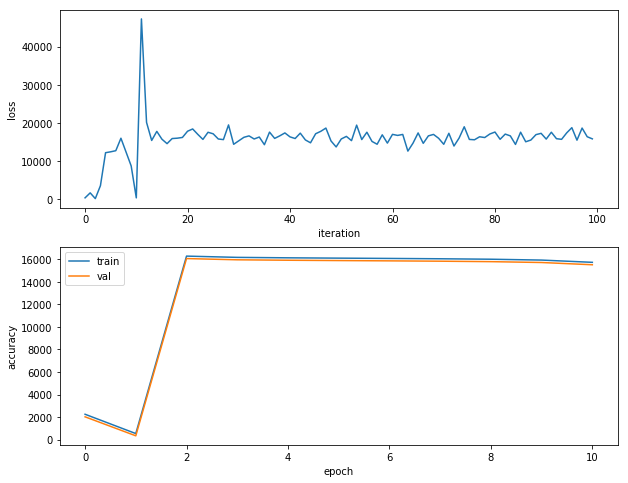

In [16]:
plt.subplot(2, 1, 1)
plt.plot(loss_history)
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(train_err_history)
plt.plot(val_err_history)
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

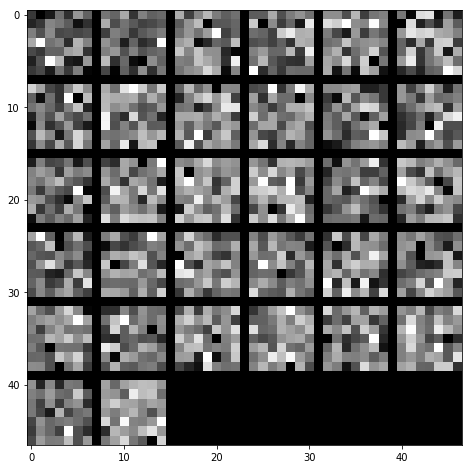

In [19]:
from cs231n.vis_utils import visualize_grid_2D
kernels = np.reshape(best_model['W1'], (32,7,7))
grid = visualize_grid_2D(kernels.transpose(0, 1, 2))
plt.imshow(grid.astype('uint8'))

In [8]:
print(best_model['W1'].shape)
print(best_model['W1'].transpose(0, 2, 3, 1).shape)

(32, 1, 7, 7)
(32, 7, 7, 1)
